In [1]:
#Logistic Regression (no RFE)
#Source (mainly for ROC): https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\rampa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
df = pd.read_csv('../csvs/salm_up.csv')
df.head()

,Year,Month,State,Genus Species,Serotype or Genotype,Etiology Status,Location of Preparation,Illnesses,Hospitalizations,Deaths,Food Vehicle,Contaminated Ingredient,Specific Location
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant,2,0.0,0.0,NaN,NaN,Sit-down dining
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16,0.0,0.0,NaN,NaN,NaN
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant,5,0.0,0.0,NaN,NaN,Sit-down dining
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant,3,0.0,0.0,NaN,NaN,"""Fast-food""(drive up service or pay at counter)"
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant,21,0.0,0.0,cookies,NaN,other or unknown type


In [4]:
# Create a set of dummy variables from the sex variable
df_State = pd.get_dummies(df['State'])
df_Genus = pd.get_dummies(df['Genus Species'])
df_Location = pd.get_dummies(df['Location of Preparation'])
df_Year = pd.get_dummies(df['Year'])
df_Month = pd.get_dummies(df['Month'])

In [5]:
# Join the dummy variables to the main dataframe
#df_new = pd.concat([df, df_State, df_Genus, df_Location, df_Year, df_Month], axis=1)
#df_new = pd.concat([df, df_Genus, df_Location], axis=1)
df_new = pd.concat([df, df_Location, df_Year, df_Month], axis=1)
df_new

,Year,Month,State,Genus Species,Serotype or Genotype,Etiology Status,Location of Preparation,Illnesses,Hospitalizations,Deaths,...,3,4,5,6,7,8,9,10,11,12
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant,5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant,3,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant,21,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant,7,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,2009,2,Minnesota,Norovirus,NaN,Confirmed,Restaurant,5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,2009,2,Minnesota,Norovirus Genogroup II,NaN,Suspected,Restaurant,22,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,2009,2,Minnesota,Norovirus,NaN,Confirmed,Restaurant,16,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,2009,2,Minnesota,Campylobacter jejuni,NaN,Confirmed,Restaurant,11,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_updated = df_new.drop(['Year', 'Month', 'State', 'Genus Species', 'Serotype or Genotype', 'Etiology Status', 'Location of Preparation', 'Food Vehicle', 'Contaminated Ingredient', 'Specific Location'], axis = 1)
df_updated.head()

,Illnesses,Hospitalizations,Deaths,Banquet,Camp,Caterer,Child,Fair,Farm/dairy,Grocery,...,3,4,5,6,7,8,9,10,11,12
0,2,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_updated.loc[df['Hospitalizations'] > 0, 'Hospitalizations'] = 1
df_updated

,Illnesses,Hospitalizations,Deaths,Banquet,Camp,Caterer,Child,Fair,Farm/dairy,Grocery,...,3,4,5,6,7,8,9,10,11,12
0,2,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,16,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Check for nan
print(np.any(np.isnan(df_updated['Deaths'])))
print(np.all(np.isfinite(df_updated)))

True
False


In [9]:
df_up2 = df_updated.fillna(0)

In [10]:
print(np.any(np.isnan(df_up2)))
print(np.all(np.isfinite(df_up2)))

False
True


In [11]:
#df_up2.to_csv('salm_up2.csv', index = False)

In [12]:
#Take classifier away from X
X = df_up2.drop(['Hospitalizations'], axis = 1)
X.head()

,Illnesses,Deaths,Banquet,Camp,Caterer,Child,Fair,Farm/dairy,Grocery,Hospital,...,3,4,5,6,7,8,9,10,11,12
0,2,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# y contains only the classifier
y = df_up2['Hospitalizations']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Hospitalizations, dtype: float64

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [15]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

C:\Users\rampa\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


         Current function value: 0.483015
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       Hospitalizations   No. Observations:                19986
Model:                          Logit   Df Residuals:                    19935
Method:                           MLE   Df Model:                           50
Date:                Sat, 05 May 2018   Pseudo R-squ.:                 0.07122
Time:                        13:37:11   Log-Likelihood:                -9653.5
converged:                      False   LL-Null:                       -10394.
                                        LLR p-value:                3.999e-277
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Illnesses                     0.0062      0.000     12.894      0.000       0.005       0.007
Deaths              

C:\Users\rampa\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rampa\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\rampa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\rampa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\rampa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
#Accuracy of train/test split 70/30
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [18]:
#K Folds Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.791


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4672   51]
 [1164  109]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.80      0.99      0.88      4723
        1.0       0.68      0.09      0.15      1273

avg / total       0.78      0.80      0.73      5996



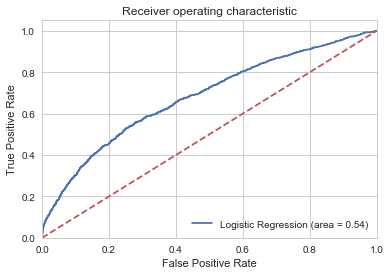

In [21]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()